# IN3061/INM430 - Tiny DS Project Final Report

Student Name: Chaeyoon Kim <br>
Project Title: Predict changing trends in suicide rates

In [1]:
import numpy as np
from numpy import median
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Prepare the master dataset for the Count of suicides

In [2]:
suicidedf = pd.read_csv('master.csv')
continent_table = pd.read_csv('continent.csv')
df = pd.merge(suicidedf, continent_table, on='country', how='inner')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe
3,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe
4,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe


### Key characteristics of the datasets

(array([14042.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 14042.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

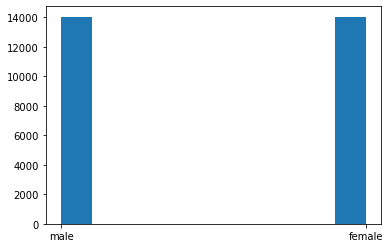

In [3]:
plt.hist(df.sex)

(array([4686.,    0.,    0.,    0., 4686.,    0.,    0.,    0., 4686.,
           0.,    0.,    0., 4686.,    0.,    0.,    0., 4686.,    0.,
           0., 4654.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

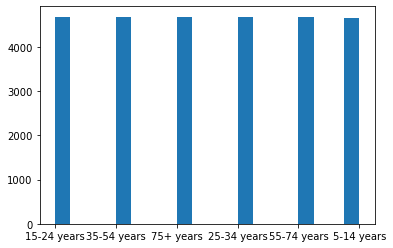

In [4]:
plt.hist(df.age, bins = 20)

(array([2412., 2172., 2412., 2820., 3012., 3156., 3072., 3156., 3072.,
        2800.]),
 array([1985. , 1988.1, 1991.2, 1994.3, 1997.4, 2000.5, 2003.6, 2006.7,
        2009.8, 2012.9, 2016. ]),
 <BarContainer object of 10 artists>)

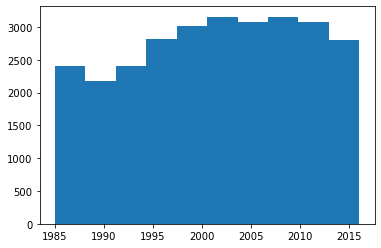

In [5]:
plt.hist(df.year)

(array([16188.,  5114.,  3228.,  1784.,  1004.,   298.,   180.,   120.,
          120.,    48.]),
 array([   251. ,  12861.1,  25471.2,  38081.3,  50691.4,  63301.5,
         75911.6,  88521.7, 101131.8, 113741.9, 126352. ]),
 <BarContainer object of 10 artists>)

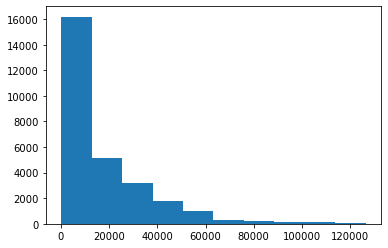

In [6]:
plt.hist(df['gdp_per_capita ($)'])

### Grouping countries by continent

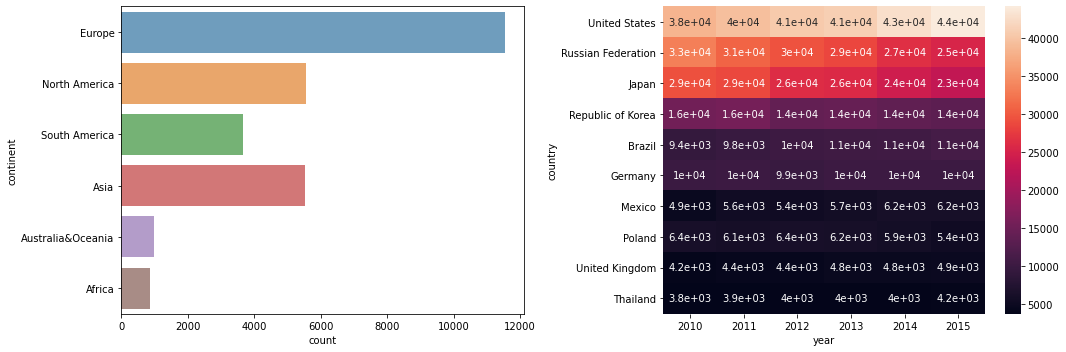

In [7]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.countplot(y='continent', data=df, alpha=0.7, ax=ax1)

p = pd.crosstab(index=df.country, columns=df.year, values=df.suicides_no, aggfunc='sum')
sns.heatmap(p.loc[:,2010:2015].sort_values(2015, ascending=False).dropna().head(10), annot=True, ax=ax2)
pp = pd.crosstab(index=df.country, columns=df.year, values=df.population, aggfunc='sum')
pdivpp = p/pp #number of death by population

plt.tight_layout()
plt.show()

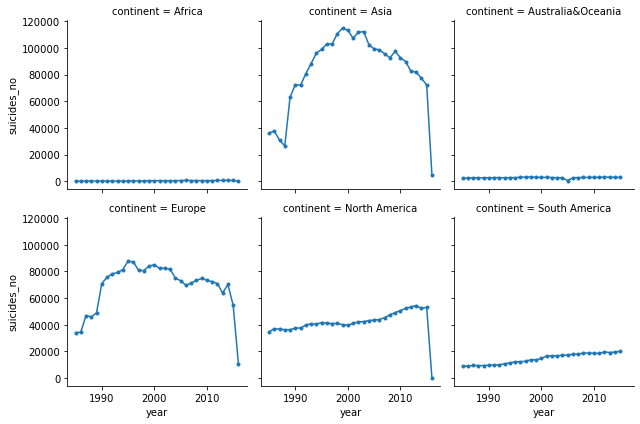

In [8]:
g = sns.FacetGrid(df.groupby(['continent','year']).suicides_no.sum().reset_index(), col='continent', col_wrap=3)
g = g.map(plt.plot, 'year', 'suicides_no', marker='.')

In [9]:
dfsort = df.groupby(by=['continent','country'])['suicides/100k pop'].sum().unstack().reset_index().melt(id_vars='continent').dropna().sort_values(by=['value'], ascending=False)
dfsort.head(10)

,continent,country,value
451,Asia,Russian Federation,11305.13
315,Europe,Lithuania,10588.88
243,Europe,Hungary,10156.07
283,Asia,Kazakhstan,9519.52
439,Asia,Republic of Korea,9350.45
39,Europe,Austria,9076.23
573,Europe,Ukraine,8931.66
277,Asia,Japan,8025.23
195,Europe,Finland,7924.11
75,Europe,Belgium,7900.50


## Cluster countries in close region and filter Republic of Korea with neighbor Asia countries

In [10]:
top_continent = ['Asia', 'Europe']
top_df = df[df['continent'].isin(top_continent)].sort_values(by=['suicides_no'], ascending=False)
top_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
21260,Russian Federation,1994,male,35-54 years,22338,19044200,117.30,Russian Federation1994,NaN,"395,077,301,248",2853,Boomers,Asia
21272,Russian Federation,1995,male,35-54 years,21706,19249600,112.76,Russian Federation1995,NaN,"395,531,066,563",2844,Boomers,Asia
21344,Russian Federation,2001,male,35-54 years,21262,21476420,99.00,Russian Federation2001,NaN,"306,602,673,980",2229,Boomers,Asia
21332,Russian Federation,2000,male,35-54 years,21063,21378098,98.53,Russian Federation2000,NaN,"259,708,496,267",1879,Boomers,Asia
21321,Russian Federation,1999,male,35-54 years,20705,21016400,98.52,Russian Federation1999,NaN,"195,905,767,669",1412,Boomers,Asia


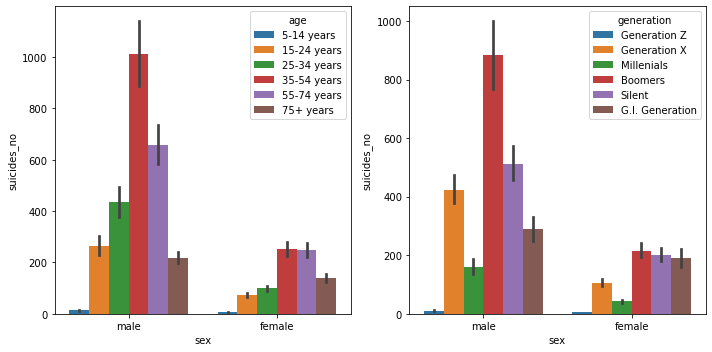

In [11]:
hue_order1 = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
hue_order2 = ['Generation Z', 'Generation X', 'Millenials', 'Boomers', 'Silent', 'G.I. Generation']

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.barplot(x='sex', y='suicides_no', hue_order=hue_order1, hue='age', data=top_df, ax=ax1) #35-54 year people suicides the most
sns.barplot(x='sex', y='suicides_no', hue_order=hue_order2, hue='generation', data=top_df, ax=ax2) #Boomers generaton's people suicides the most

plt.tight_layout()
plt.show()

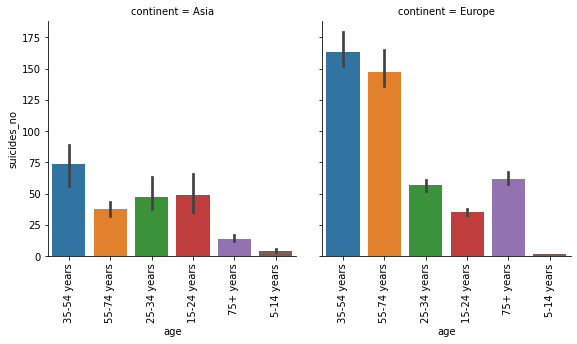

In [12]:
g = sns.catplot(x='age', y='suicides_no', col='continent', data=top_df, estimator=median, height=4, kind='bar')
g.set_xticklabels(rotation=90)

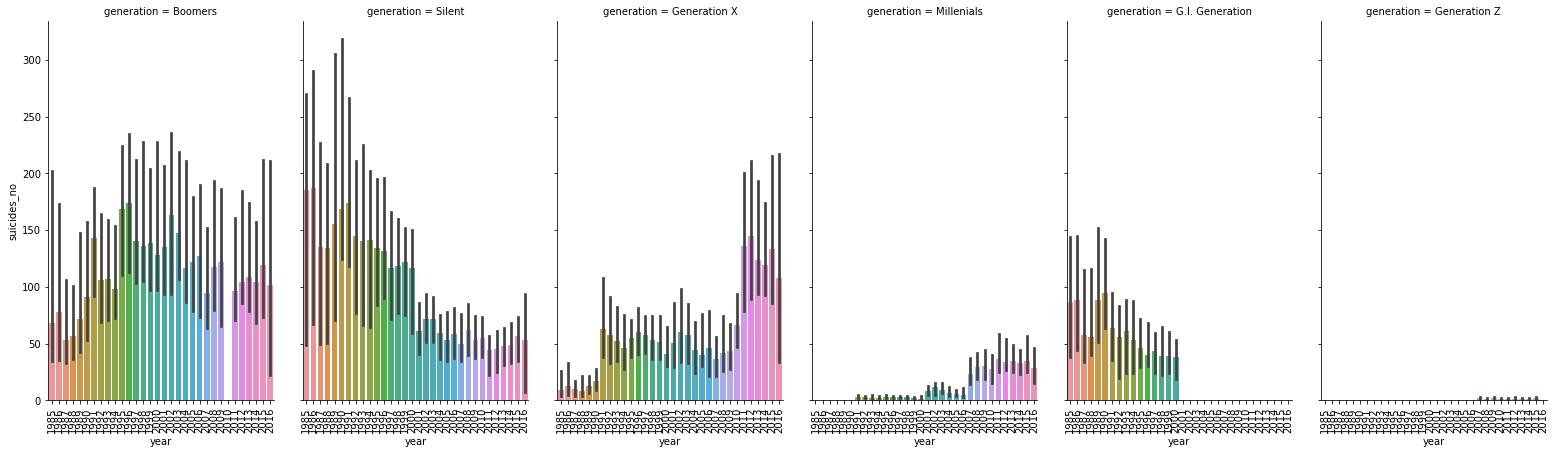

In [13]:
g = sns.catplot(x='year', y='suicides_no', col='generation', data=top_df, estimator=median, height=6, aspect=.6, kind='bar')
g.set_xticklabels(rotation=90)

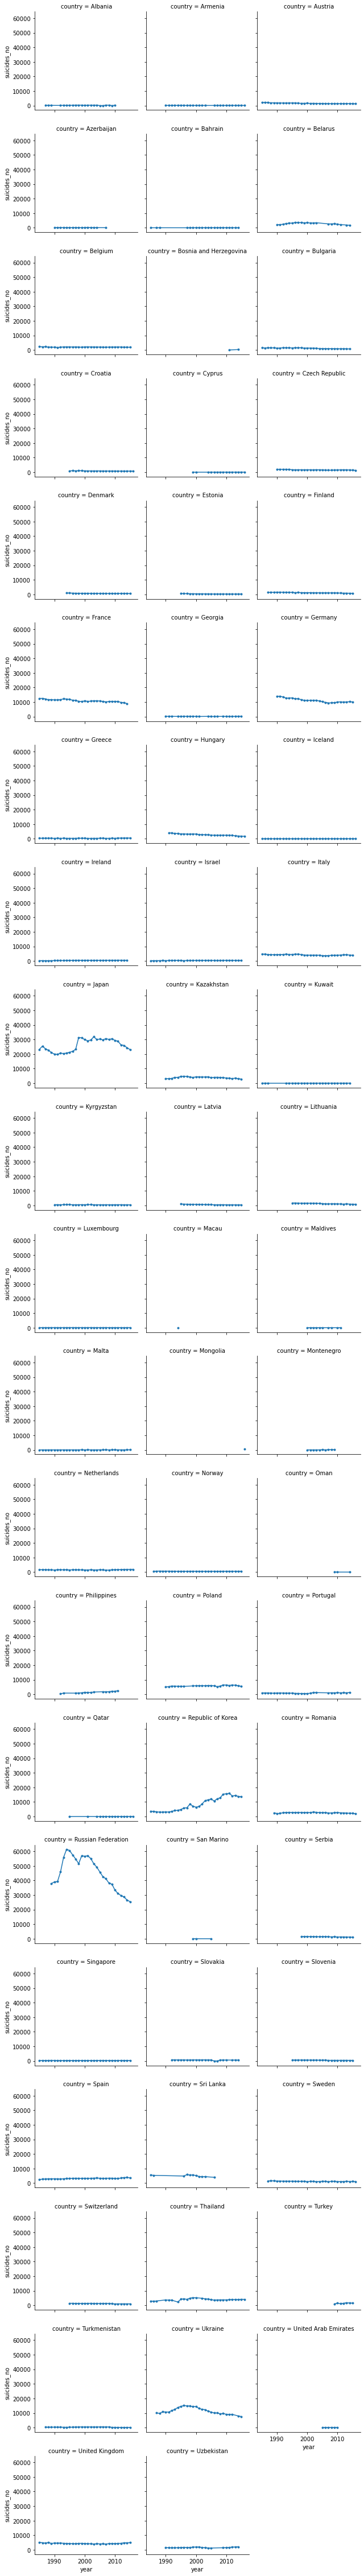

In [14]:
g = sns.FacetGrid(top_df.groupby(['country','year']).suicides_no.sum().reset_index(), col='country', col_wrap=3)
g = g.map(plt.plot, 'year', 'suicides_no', marker='.')

## Prepare the Happiness dataset to take additional features

In [15]:
hap1 = pd.read_csv('2015.csv')
hap2 = pd.read_csv('2016.csv')
hap3 = pd.read_csv('2017.csv')
hap4 = pd.read_csv('2018.csv')
hap5 = pd.read_csv('2019.csv')
hap1['year'] = 2015
hap2['year'] = 2016
hap3['year'] = 2017
hap4['year'] = 2018
hap5['year'] = 2019

### matching country names by local alignment

In [16]:
df = pd.concat([hap1, hap2, hap3, hap4, hap5])
df.replace({'country': {'South Korea':'Republic of Korea', 'Russia':'Russian Federation', 'Northern Cyprus':'Cyprus'}}, inplace=True)

In [17]:
df = pd.merge(df, continent_table, on='country', how='inner')
df

,country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Life Expectancy,Freedom,Government Corruption,Generosity,Dystopia Residual,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,continent
0,Switzerland,Western Europe,1,7.587,0.03411,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015,NaN,NaN,NaN,NaN,Europe
1,Switzerland,Western Europe,2,7.509,NaN,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,2.694630,2016,7.428,7.590,NaN,NaN,Europe
2,Switzerland,NaN,4,7.494,NaN,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716,2017,NaN,NaN,7.561772,7.426227,Europe
3,Switzerland,NaN,5,7.487,NaN,1.420000,1.549000,0.927000,0.660000,0.357000,0.256000,NaN,2018,NaN,NaN,NaN,NaN,Europe
4,Switzerland,NaN,6,7.480,NaN,1.452000,1.526000,1.052000,0.572000,0.343000,0.263000,NaN,2019,NaN,NaN,NaN,NaN,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,Afghanistan,NaN,154,3.203,NaN,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN,2019,NaN,NaN,NaN,NaN,Asia
417,Puerto Rico,Latin America and Caribbean,15,7.039,NaN,1.359430,1.081130,0.777580,0.468230,0.122750,0.222020,3.007600,2016,6.794,7.284,NaN,NaN,North America
418,Belize,Latin America and Caribbean,52,5.956,NaN,0.876160,0.686550,0.455690,0.512310,0.107710,0.236840,3.080390,2016,5.710,6.202,NaN,NaN,North America
419,Belize,NaN,50,5.956,NaN,0.907975,1.081418,0.450192,0.547509,0.096581,0.240016,2.631956,2017,NaN,NaN,6.197242,5.714757,North America


### Key characteristics of the datasets

(array([  2.,   2.,   4.,  12.,  27.,  42.,  71.,  88., 108.,  65.]),
 array([0.11037 , 0.263733, 0.417096, 0.570459, 0.723822, 0.877185,
        1.030548, 1.183911, 1.337274, 1.490637, 1.644   ]),
 <BarContainer object of 10 artists>)

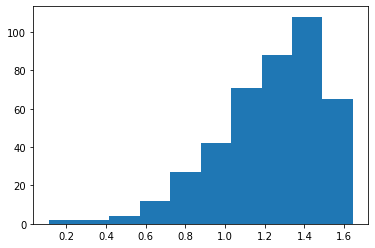

In [18]:
plt.hist(df.Family)

(array([  2.,   6.,   5.,   8.,  28.,  95., 114., 115.,  37.,  11.]),
 array([0.04986867, 0.1589818 , 0.26809493, 0.37720807, 0.4863212 ,
        0.59543433, 0.70454747, 0.8136606 , 0.92277373, 1.03188687,
        1.141     ]),
 <BarContainer object of 10 artists>)

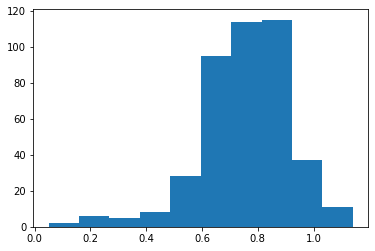

In [19]:
plt.hist(df['Life Expectancy'])

(array([ 6., 13., 24., 30., 37., 57., 76., 89., 74., 15.]),
 array([0.    , 0.0724, 0.1448, 0.2172, 0.2896, 0.362 , 0.4344, 0.5068,
        0.5792, 0.6516, 0.724 ]),
 <BarContainer object of 10 artists>)

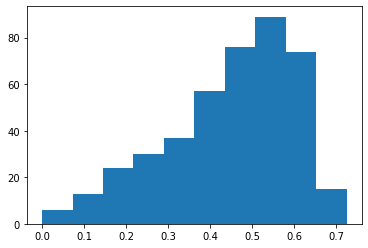

In [20]:
plt.hist(df.Freedom)

(array([126.,  92.,  58.,  37.,  23.,  29.,  21.,  20.,  10.,   4.]),
 array([0.      , 0.052208, 0.104416, 0.156624, 0.208832, 0.26104 ,
        0.313248, 0.365456, 0.417664, 0.469872, 0.52208 ]),
 <BarContainer object of 10 artists>)

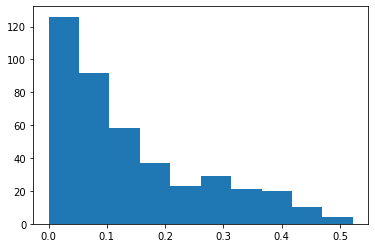

In [21]:
plt.hist(df['Government Corruption'])

### Grouping countries by continent

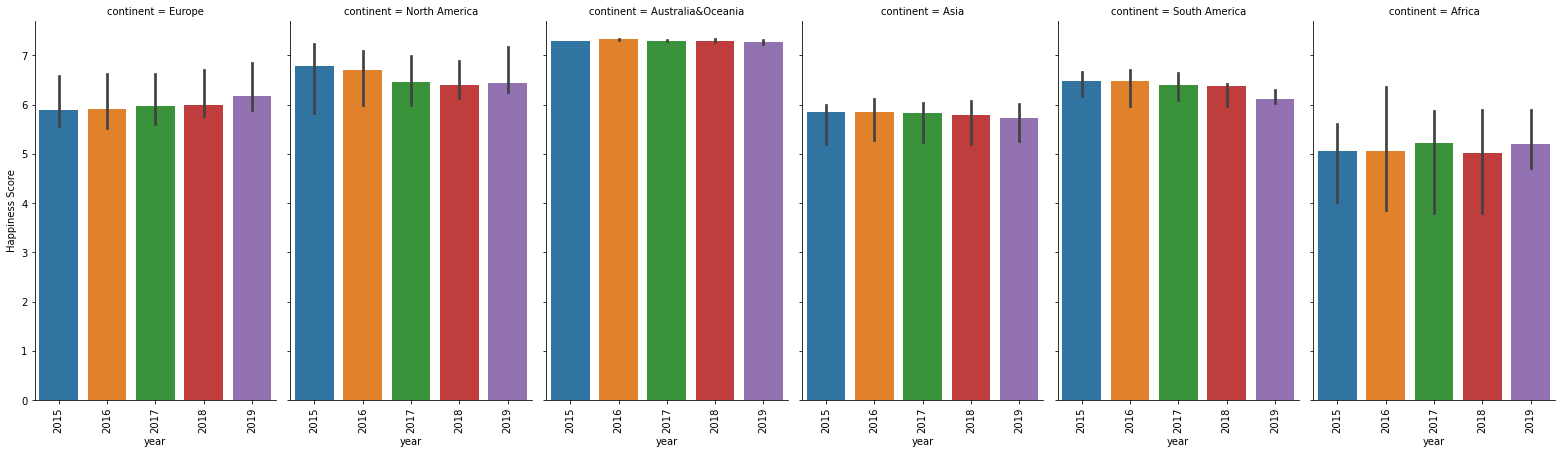

In [22]:
g = sns.catplot(x='year', y='Happiness Score', col='continent', data=df, estimator=median, height=6, aspect=.6, kind='bar')
g.set_xticklabels(rotation=90)

In [23]:
top_continent = ['Asia', 'Europe']
top_df = df[df['continent'].isin(top_continent)].sort_values(by=['Happiness Score'], ascending=False)

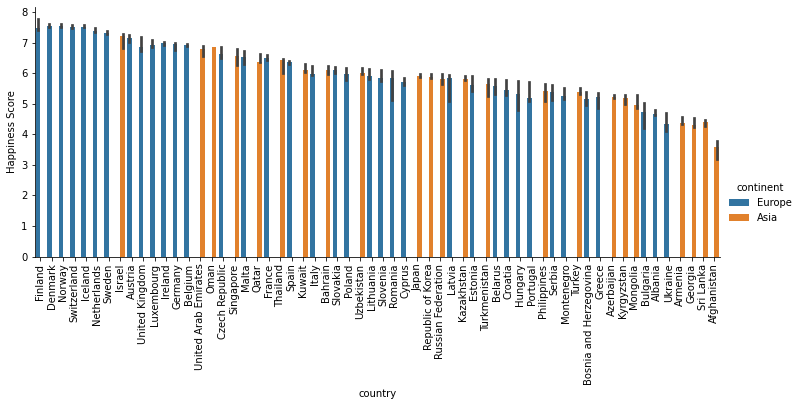

In [24]:
g = sns.catplot(x='country', y='Happiness Score', hue='continent', data=top_df, estimator=median, kind='bar', height=4, aspect=2.5)
g.set_xticklabels(rotation=90)

In [25]:
top_dfsort = top_df.groupby(by=['continent','country'])['Happiness Score'].mean().unstack().reset_index().melt(id_vars='continent').dropna().sort_values(by=['value'], ascending=True)
top_dfsort.head(10)

,continent,country,value
0,Asia,Afghanistan,3.5128
113,Europe,Ukraine,4.3072
34,Asia,Georgia,4.3388
100,Asia,Sri Lanka,4.3926
4,Asia,Armenia,4.3932
19,Europe,Bulgaria,4.6186
3,Europe,Albania,4.7126
66,Asia,Mongolia,5.0292
39,Europe,Greece,5.1524
17,Europe,Bosnia and Herzegovina,5.1618
